    Тема проекта: Прогнозирование глоабльных продаж компьютерных игр для интернет-магазина

    Цель проекта
    Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Шаг 1 Первичное описание данных

In [942]:
# Импортируем необходимые для разведовательного и статистического анализа данных библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8) 
plt.style.use('ggplot') 
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from scipy import stats as st

In [943]:
# Прочитаем файл с данными, сохраним в новый датафрейм 
df_games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

    Выведем информацию описательные характеристики структуры данных и первые 5 строк файлов. Приступим к описательному анализу данных.

In [944]:
# Выведем структуру датафрейма и первые 5 строк
df_games.info()
display(df_games.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


    Ввиду того, что названия столбцов представлены заглавными буквами и итерироваться по ним в дальнейшем будет сложно, приведем их формат к прописным символам

In [945]:
# Приведем название столбцов к прописным символам для облегчения итерации по столбцам в дальнейшем
df_games.columns = map(str.lower, df_games.columns)
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


    Приведем транскрипты переменных: 

    name - название игры
    platform — игровая платформа
    year_of_release — год выпуска финальной версии игры
    genre — жанр игры
    na_sales - продажи в странах Северной Америки
    eu_sales - продажи в странах Европы
    jp_sales - продажи в Японии
    other_sales - продажи в других странах
    critic_score — оценка критиков (максимум 100)
    user_score — оценка пользователей (максимум 10)
    Категории переменно:
    "tbd" (to be determined) - еще пока не определен
    rating — возрастной рейтинг ESRB

    Категории переменной:
    «EC» («Early childhood») — «Для детей младшего возраста» (от 3 лет)
    «E» («Everyone») — «Для всех» (от 6 лет и старше)
    «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
    «T» («Teen») — «Подросткам» (от 13 лет и старше)
    «M» («Mature») — «Для взрослых» (от 17 лет и старше)
    «AO» («Adults Only 18+») — «Только для взрослых» (от 18 лет и старше)
    «RP» («Rating Pending») — «Рейтинг ожидается»


In [946]:
# Проверим наличие и кол-во пропусков в данных
df_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [947]:
# Вычислим долю пропущенных значений в данных
df_games.isna().sum() / len(df_games)

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [948]:
# Выведем на экран кол-во игр с неопределенным статусом пользовательского рейтинга tbd
print('В столбце с оценкой пользователей содержится', len(df_games[df_games['user_score'] == 'tbd']), 'строк, содержащих tbd')

В столбце с оценкой пользователей содержится 2424 строк, содержащих tbd


In [949]:
# Проверим наличие дубликатов
df_games.duplicated().sum()

0

    Ввиду того, что данные об играх могут быть представлены не однородно, проверим кол-во уникальных игр и кол-во уникальных платформ 

In [950]:
# Проверим кол-во уникальных названий игр: 11559 наименований из 16715 в общей сложности
df_games.name.nunique()

11559

In [951]:
# Проверим кол-во уникальных игровых платформ: 31 платформа
df_games.platform.nunique()

31

In [952]:
# Выведем наименования этих платформ
df_games.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [953]:
# Выведем кол-во уникальных платформ для того, чтобы оценить наиболее и наименее встречающиеся, а также те, 
# что встречаюься экстремально часто и чрезвычайно редко
df_games.platform.value_counts().head()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: platform, dtype: int64

In [954]:
# Посмотрим, какой процент всей выборки составляют наиболее встречающиеся платформы и экстречально часто встречающиеся: PS2, DS
df_games.platform.value_counts().head() / len(df_games)

PS2     0.129285
DS      0.128687
PS3     0.079629
Wii     0.078971
X360    0.075501
Name: platform, dtype: float64

In [955]:
df_games.platform.value_counts().tail()

SCD     6
3DO     3
TG16    2
GG      1
PCFX    1
Name: platform, dtype: int64

In [956]:
# Выведем представленные в данных значения рейтинга за весь временной интервал игр
df_games.rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

    NB! Любопытно, что K-A - это значение рейтинга, использовавшегося до 1998 года в качестве E, а позже в качестве E10+ - т.е для тех, кто уже научился говорить и держать джойстик (от 10 лет и старше). Т.е., скорее всего, данное обозначение рейтинга на 2016 год не релевантное, и актуально для игр, выпущенных до 1998 года. 

    Выведем описательную статистику для всех возможных переменных для того, чтобы оценить меры разброса значений и насыщенность данных

In [957]:
df_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Промежуточный вывод

    Итак, мы располагаем 16715 наблюдений - строк с характеристиками проданных с 1980-го по 2016-й гг. игр для различных игровых платформ: консолей и персонального компьютера. Данные о продажах игр по годам представлены крайне не равномерно: меньше всего строк за периоды с 1980 по 2003 и за 2016 годы. Наибольшее количество данных о продажах представлены для игр, выпущенных с 2003 по 2010 гг.
    Исходя из первичного анализа данных мы можем сделать следующие замечания и выводы:
        1) В данных встречаются повторяющиеся наименование игр - кол-во уникальных наименований игр меньше кол-ва всех строк всего датафрейма, что свидетельствует о том, что одни и те же игры  за весь исторический период выпущены под более чем одну платформу. Количество таковых: 11559 наименований из 16715 в общей сложности.
        2) Данные представлены - в некоторых исторических наименованиях рейтингах  ESRB (например, К-А - для игр, выпущенных до 1998 года, что в современных рейтингах означает категорию E+10 (т.е. для детей старше 10 лет). Если в последующем срезе данных такие индексы встретятся, их следует объединить с E+10 для более адекватной оценки влияния рейтингов ESRB на продажи игр в разных странах.
        3) В данных не встречаются полные дубликаты, зато довольно обильное количество пропусков и неопределенных значений. Так, самыми незаполненными категориями оказались значения переменных "оценка критиков", "пользовательская оценка" и "рейтинг ESRB (от 40% до 50% от общего объема данных - не принимая во внимание наличие маркеров - артефактов - типа tbd - еще пока не определенного значения пользовательского рейтинга - кол-во таковых почти 2.5 тысячи. Эти данные требуют специфической замены на аппроксимированные значения по жанрам и рейтингам ESRB. С одной стороны, нет ни одного способа с уверенной точностью предсказать пропущенные значения в переменных экспертного и пользовательского рейтинга - для каждой конкретной игры он уникальный - с другой, игнорирование пропусков в этих переменных с последующим фильтром их для статистических тестов могут привести к существенном снижению объема выборки и потери релевантной части характеристик игр. Что же касается рейтинга ESRB - то значения этого рейтинга также могут быть заменены на самые частотные по жанрам - игнорирование пропусков в этой переменнной не критично, однако, если после замены значения этой переменной распределяться пропорционально по жанрам - значения следует заменить для более адекватной взвешенной оценки влияния этого рейтинга на продаже в сравнении с пользовательскими и экспертными оценками.
    Что же касается пропусков в значений в переменный жанр, название игры и год выпуска игры - то пропуски в этих переменных составляют менее 5% выборки, поэтому могут быть удалены. Однако, в случае с годами выпуска мы прибегнем к сравнительному анализу распределений значений продаж и кол-ва выпущенных игр по данным годам для того, чтобы удостовериться, что исключение данных из выборки не исключит интересующие нас редкие иэкстремально высокие значения по продажам игр. Именно в этом анализе статистические выбросы вызывают особенный интерес и подлежат отдельному детальному изучению - т.к. речь идет о "хитах" продаж.
        4) Некоторые переменные будут подвержены приведению типов. Переменная "Год выпуска" - в целочисленный (interge), Переменная "Пользовательская оценка" - в вещественный тип данных (float) - ввиду того, что значения tbd (т.е. неопределенные рейтинги) будут заменены на NaN и подвержены аппроксимации по значениями для жанров.  Ни значения продаж по регионам, ни экспертные и пользовательские оценки не будут подвержены округленю, ввиду дальнейшей наглядности диаграмм размаха значений.
        5) В данных обилие статистических выбросов (по объему продаж в млн. экземпляров и в оценке критиков) - что свидетельствует о наличии в датасете строк с играми - лидерами продаж, или "хитами" - легендарными играми, имеющие невероятно большие глобальные ппродажи и чрезвычайно высокие оценки. Эти данные могут чрезвычайно сильно искажать распределения интересующих нас переменных - детерминант продаж. В данных также чрезвычайно мало игр с 1980-х по 1990-е гг., в то же время, 2016-й год также не насыщенный - это может исказить динамику глобальных продаж игр по годам. Итак, в датасете представлены две экстремально часто встречающиеся платформы PS2 и DS (>2100 строк) - в купе они составляют примерно 26% - вместе с остальными тремя из тройки - это почти треть выборки. Что это за мега-популярные платформы: PS2 (PlayStation2) - 2000-2013 гг.. - на 2011 год продано 155 млн. копий. консоли. В 2012 году прекращено производство в Японии (на год раньше). Бестселлер - Grand Theft Auto: San Andreas (более 20 млн. копий)  ; DS(Nintendo DS) - корманная игровая консоль, выпущенная в 2004 году (США, Канада, Япония) - в Европе с 2005 г. до 2013 года. Бестселлер - New Super Mario Bros, Nintendogs


## Шаг 2. Подготовка данных

    На первом этапе проанализируем и заменим / удалим пропущенные значения в датасете для того, чтобы подготовить данные к статистическому анализу

    Так как пропущенные значения в названиях игр, жанрах и годах выпуска составляют менее 5% выборки, а также ввиду того, что пропущенные значения в годах - не могут быть аппроксимированы медианными значениями по жанрам и платформам (исходя из здравого смысла) - принимаем решение удалить строки с пропущенными значениями в представленных переменных. В противном случае значениях переменных могут быть сильно искажены по играм - что приведет к недостоверной интерпретации результатов

In [958]:
df_games = df_games[~df_games['genre'].isnull() & ~df_games['name'].isnull()].copy()
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [959]:
# Посмотрим на распределение игровых платформ в пропущенных значениях переменной год выпуска игры.
df_games.query('year_of_release == "NaN"')['platform'].value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

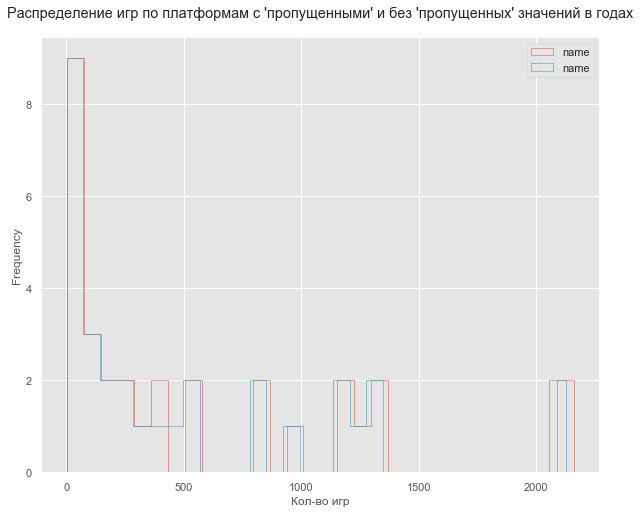

In [960]:
ax = df_games.groupby('platform').agg({'name': 'count'}).plot(kind='hist', histtype='step', bins=30)
df_games[~df_games['year_of_release'].isnull()].groupby('platform').agg({'name': 'count'}).plot(kind='hist', histtype='step' ,bins=30, ax=ax)
plt.xlabel('Кол-во игр')
ax.set_title("Распределение игр по платформам с 'пропущенными' и без 'пропущенных' значений в годах", pad = 20);


In [961]:
# Проверим, есть ли в списке удаляемых строк игр с пропущенными значениями годов выпуска редко встречаемые платформы всего датасета
a = df_games.platform.value_counts().tail(10)
a = a.reset_index().drop(columns='platform')

In [962]:
b = df_games.query('year_of_release == "NaN"')['platform'].value_counts()
b = b.reset_index().drop(columns='platform')

In [963]:
b

,index
0,PS2
1,Wii
2,X360
3,DS
4,PS3
5,XB
6,2600
7,PC
8,PSP
9,GC


In [964]:
b.merge(a, on='index', how='left')

,index
0,PS2
1,Wii
2,X360
3,DS
4,PS3
5,XB
6,2600
7,PC
8,PSP
9,GC


In [965]:
# Избавимся от пропущенных значений в годах выпуска игр. Проверим наличие пропущенных значений.
df_games = df_games[~df_games['year_of_release'].isnull()].copy()
df_games.isna().sum() / len(df_games)

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64

    Переменная "Оценка критиков" содержит более 50% пропущенных значений, а значит, требует специфической обработки. Наиболее релевантным способом апроксимации пропущенных значений этой переменной мы считаем категорию жанр.   

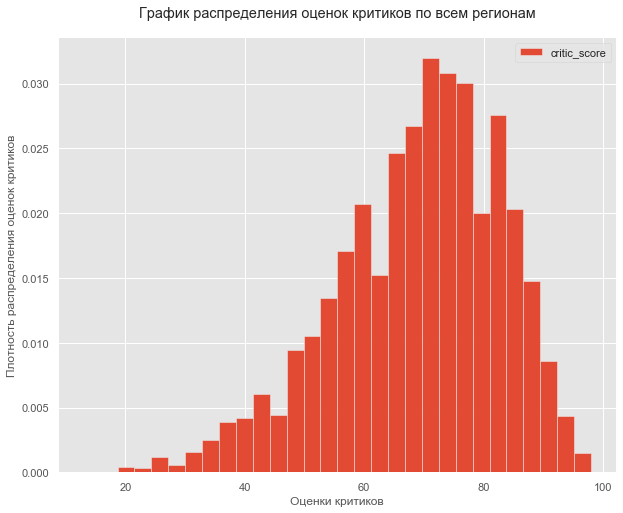

In [966]:
# Построим график плотности распределения значений оценок критиков по всем играм с 1980 года.
df_games.plot(kind='hist', y='critic_score', bins=30, density=True);
plt.ylabel('Плотность распределения оценок критиков')
plt.xlabel('Оценки критиков')
plt.title("График распределения оценок критиков по всем регионам", pad = 20);

In [967]:
#  Сгруппируем данные по жанрам, агрегируем по медианным значениям оценок критиков, сохраним в новую переменную
genre_median_cs = df_games.groupby(['genre']).agg({'critic_score': 'median'})
genre_median_cs

,critic_score
genre,
Action,68.0
Adventure,66.0
Fighting,72.0
Misc,69.0
Platform,69.5
Puzzle,70.0
Racing,69.0
Role-Playing,74.0
Shooter,73.0


In [968]:
# Напишем функции по замене пропущенных значений оценок критиков
def critic_median(row):
    genre = row['genre']
    critic_score = row['critic_score']
    if np.isnan(critic_score):
        return genre_median_cs.loc[genre, 'critic_score']      
    return critic_score

df_games['critic_score'] = df_games.apply(critic_median, axis = 1)

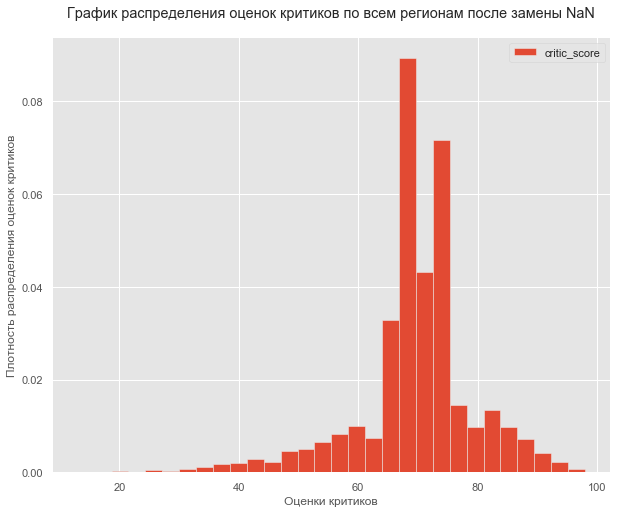

In [969]:
# Построим график плотности распределения значений оценок критиков после заполнения пропусков
df_games.plot(kind='hist', y='critic_score', bins=30, density=True);
plt.ylabel('Плотность распределения оценок критиков')
plt.xlabel('Оценки критиков')
plt.title("График распределения оценок критиков по всем регионам после замены NaN", pad = 20);

    Заполнение пропущенных значений рейтинга ESRB, на первый взгляд, кажется нерелевантным. С одной стороны, рейтинг составляется независимой организацией и сколько-нибудь приблизительно точно мы не можем его предсказать. С другой стороны, если мы прибегнем к аппроксимации пропущенных значений этой переменной на основе значений по жанрам, мы обнаружим, что далеко не у всех жанров игры присутствует возрастная специфика

In [970]:
# Сгруппирем данные по индексу ESRB и жанру, подсчитаем кол-во игр для каждого жанра игры для конкретной возрастной группы игры
df_games.groupby(['rating', 'genre'])['name'].count()

rating  genre       
AO      Action             1
E       Action           410
        Adventure        159
        Fighting           8
        Misc             449
        Platform         354
        Puzzle           284
        Racing           576
        Role-Playing      83
        Shooter           47
        Simulation       321
        Sports          1162
        Strategy          68
E10+    Action           468
        Adventure         67
        Fighting          19
        Misc             166
        Platform         141
        Puzzle            42
        Racing            95
        Role-Playing     111
        Shooter           56
        Simulation        47
        Sports           105
        Strategy          76
EC      Action             1
        Adventure          2
        Misc               5
K-A     Misc               1
        Strategy           2
M       Action           596
        Adventure         98
        Fighting          48
        Misc          

    Так, если в категории "для детей от 6 лет" (Е) - доминируют игры жанра "Спорт", то для игры E, M, T -  наиболее характерны изры жанра "Экшн". Тем не менее, ввиду большого количества пропусков в этой переменной, мы предлагаем заполнить их самыми частотными значениями по жанрам для насыщения данных.

In [971]:
# Для этого создадим таблицу с медианными значениями рейтинга ESRB - чтобы получить самые частотные значения
mode_tbl = df_games.groupby(['genre']).agg({'rating' : pd.Series.mode})
mode_tbl

,rating
genre,
Action,T
Adventure,E
Fighting,T
Misc,E
Platform,E
Puzzle,E
Racing,E
Role-Playing,T
Shooter,M


In [972]:
# Напишем цикл, который принимает на вход значения переменной ESRB рейтинг, и заменяет пропуски самыми частотными значениями
for genre in mode_tbl.index:
    df_games.loc[df_games['genre'] == genre, 'rating'] = df_games.loc[df_games['genre'] == genre, 'rating'].fillna(mode_tbl.loc[genre, 'rating'])

In [973]:
# Проверим, сохранилось ли пропорциональное распределение самых частотных значений
df_games.groupby(['genre', 'rating'], as_index = False) \
    .agg({'name': 'count'}).sort_values(by = 'name', ascending = False) \
    .groupby(['genre']).agg({'rating' : 'first'})

,rating
genre,
Action,T
Adventure,E
Fighting,T
Misc,E
Platform,E
Puzzle,E
Racing,E
Role-Playing,T
Shooter,M


    Обратимся к замене пропусков в пользовательских оценках. Примечательно, что на более чем 90% пропуски этой переменной соседствуют с пропусками значений ESRB рейтинга. Есть два варианта заполнения пропусков данной переменной: 1. На основе значений индексов ESRB (из данных выше видно, что самыми незаполненными категориями пользовательских оценок оказались игры с категорией E (возраст 3+), что актуализировало причину отсутствия пропусков в том, что пользователи младшего возраста не рефлексируют по поводу отзывов, то есть не оставляют их, в отличии от взрослых игроков. 2. На основе аппроксимации медианных значений по жанрам (как и в случае с пропусками значений в оценке критиков). Принимая во внимание тот факт, что после заполнения пропусков значений рейтинга ESRB, картина разбиения | пропорции пропущенных значений переменной оценки пользователей в разбивке по рейтингу ESRB не изменилась (см. ниже), принимаем решение заполнить пропуски первым вариантом. 

    Для начала посмотрим на распределение значений рейтинга до замены, чтобы оценить эффект аппроксимации в дальнейшем, на основе такого же распределения. Во-первых, Для этого, сначала заменим tbd - (оценка еще поставлена) на NaN - ввиду того, что пропущенных значений этой категории более 2000, и, в случае исключения таковых из выборки, присвоив маркер-артефакт, мы лишимся существенной части данных, на основе подвыборок которых по жанрам и платформам планируется проводить t-тест (т.е. выборки станут достаточно малы для анализа, что актуализирует требование нормальности распределения и альтернативные критерии, например, категориальные Манна-Уитни). Во-вторых, построим гистограмму распределения значений без NaN переменной "пользовательские оценки".

In [974]:
# Заменим tbd на NaN. Проверим результат замены.
df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = np.nan
len(df_games.loc[df_games['user_score'] == 'tbd'])

0

In [975]:
# Приведем переменную к значениям с десятичными значениями переменной (float64)
df_games['user_score'] = df_games['user_score'].astype('float64')

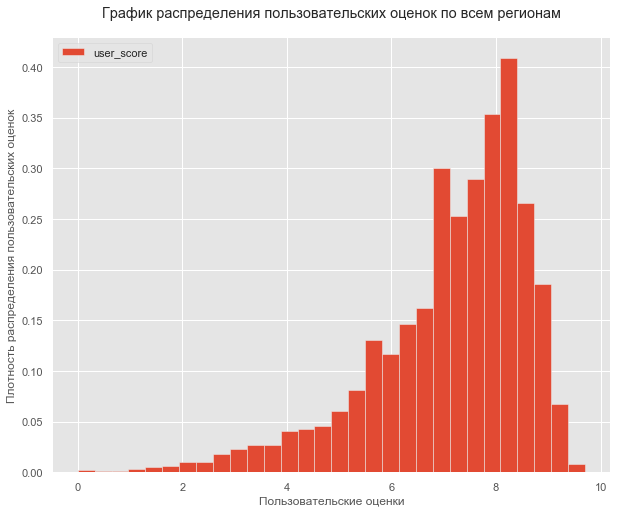

In [976]:
# Построим график плотности распределения значений пользовательских рейтингов по всем играм с 1980 года.
df_games.plot(kind='hist', y='user_score', bins=30, density=True);
plt.ylabel('Плотность распределения пользовательских оценок')
plt.xlabel('Пользовательские оценки')
plt.title("График распределения пользовательских оценок по всем регионам", pad = 20);

In [977]:
# Подготовим агрегированную таблицу с медианными значениями пользовательских оценок по жанрам
rating_median_users = df_games.groupby('genre').agg({'user_score': 'median'})
rating_median_users

,user_score
genre,
Action,7.4
Adventure,7.6
Fighting,7.6
Misc,7.1
Platform,7.7
Puzzle,7.5
Racing,7.4
Role-Playing,7.8
Shooter,7.4


In [978]:
# Напишем функцию для замены NaN в пользовательских оценках аппроксимированными медианными значениями по жанрам
def user_median(row):
    genre = row['genre']
    user_score = row['user_score']
    if np.isnan(user_score):
        return rating_median_users.loc[genre, 'user_score']      
    return user_score

df_games['user_score'] = df_games.apply(user_median, axis = 1)

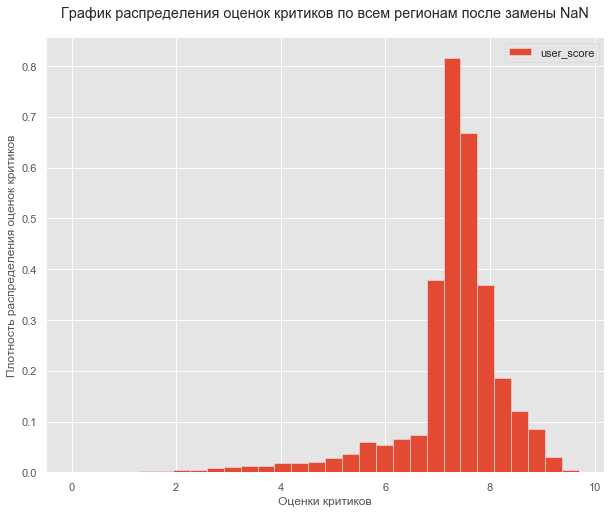

In [979]:
# Построим график плотности распределения значений пользовательских оценок игр после замены пропущенных значений
df_games.plot(kind='hist', y='user_score', bins=30, density=True);
plt.ylabel('Плотность распределения оценок критиков')
plt.xlabel('Оценки критиков')
plt.title("График распределения оценок критиков по всем регионам после замены NaN", pad = 20);

    Теперь добавим в таблицу суммарные значения по глобальным продажам (во всем Мире в мл.) копий игр.

In [980]:
# Напишем функцию для создания столбца суммы продаж по всем регионам
def all_sales(row):
    na = row['na_sales']
    eu = row['eu_sales']
    jp = row['jp_sales']
    other = row['other_sales']
    return (na + eu + jp + other)
df_games['all_sales'] = df_games.apply(all_sales, axis=1)

In [981]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.5,7.7,E,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,31.38


    Закончим приведение типов, и переведем перенную год выпуска - к целочисленном значению (interge)

In [982]:
df_games['year_of_release'] = df_games['year_of_release'].astype('int64')

In [983]:
df_games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
all_sales          float64
dtype: object

## Шаг 3 Исследовательский анализ данных

    В этом разделе мы приоретизируем релевантные временные интервалы и платформы, на основании которых мы сможем прогнозировать продажи игр на 2017 год.

    Для этого, 
    Во-первых, посмотрим на динамику игр в разные годы. 
    Во-вторых, посмотрим на динамику продаж игр разных платфор за весь период и определим релевантный для анализа временной интервал - характерными признаками которого являются следующие характеристики: на нем исчезают старые и появляются новые платформы, позиционирующие себя в 2016 году.
    В-третьих, мы определим несколько потенциально прибыльных платформ в релевантном временном интервале
    В-четвертых, определим влияние оценок пользователей и критиков на продажи перспективных (популярных) игровых платформ 
    В-пятых, посмотрим на распределение игр по жанрам и определим наиболее / наименее популярные

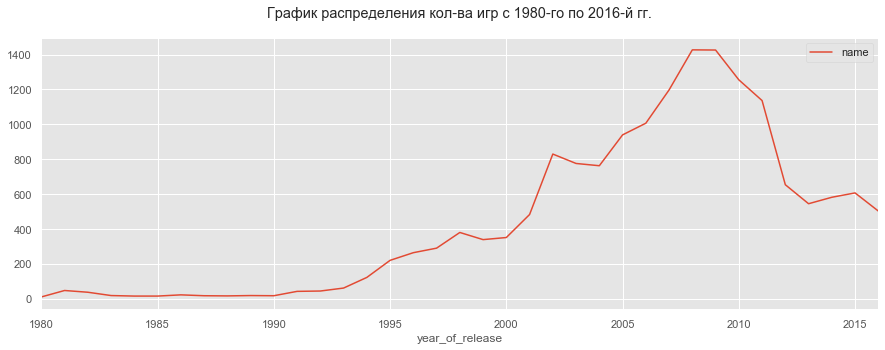

In [984]:
# Посмотрим, сколько игр выпускалось в разные годы (с 1980)
df_games.groupby('year_of_release').agg({'name': 'count'}).plot(grid=True, figsize=(15, 5));
plt.title("График распределения кол-ва игр с 1980-го по 2016-й гг.", pad = 20);

    Из графика мы можем сделать вывод, что наиболее радикальный рост количества продаваемых начинается с 2000 года, он имеет два пика (2002 и 2008-2009 гг.). Далее, вне зависимости от насыщения данных (самый не насыщенный год 2016-й) - мы наблюдаем столь же радикальное снижение, которые прерывается на 2014-м году и уходит в 2016 с некотороей усредненной динамикой по всей выборке.

    Построим график распределения продаж по годам для того, чтобы определить границы временных интервалов. Для этого, 1) выберем топ-5 тех игровых платформ, для которых выпускались игры. 2) Нарисуем линейный графики динамики продаж игр, сгруппированным по данным платформам

In [985]:
# Выделим top-5 игровых платформ
top_5_pltf = df_games.groupby('platform').agg({'all_sales': 'sum'}).sort_values(by='all_sales', ascending=False).reset_index().head(5)

In [986]:
top_5_pltf

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


    Из топ-5 наиболее востребованных платформ с 1980 по 2016-й - самая архаичная платформа DS Nintendo (с 2004 года). Большая часть представленных платформ - иницирует процесс прекращения поддержки к 2013-2014 гг. 

In [987]:
# Создадим серию, по которой мы будем итерироваться для того, чтобы отобрать из датафрейма строки топовых игровых платформ
platf_top = pd.Series(top_5_pltf['platform'])
platf_top

0     PS2
1    X360
2     PS3
3     Wii
4      DS
Name: platform, dtype: object

In [988]:
# Отфильтруем по самым востребованным игровым платформам
plt_top = df_games.query('platform in @platf_top')
plt_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,75.0,7.4,E,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,70.0,7.5,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,69.0,7.4,E,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,T,0.01


In [989]:
# Посмотрим на результаты пивотника по годам и суммам продаж по платформам
plt_top.pivot_table('all_sales', index='year_of_release', columns='platform', aggfunc='sum')

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


    Исходя из сводной таблицы мы можем сказать, что в данных есть проблемы. Для платформы DS значения представлены за 1985 год очень незначительным количеством, далее до 2004 года данных нет. По другим платформам до 2000-го года данных о продажах нет. Отсортируем полученную таблицу и построим линейный график распределения.

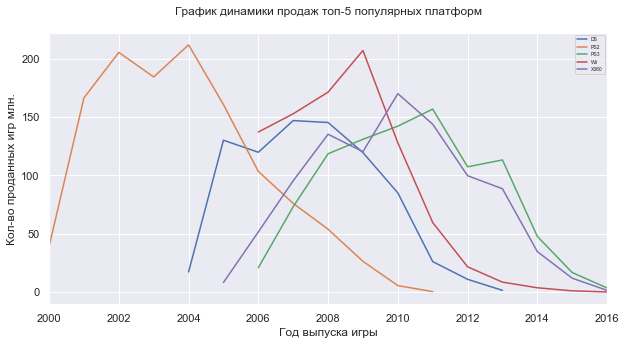

In [990]:
# Построим линейный график распределения топ-5 самых востребованных за всю историю платформ
sns.set()
plt_top.pivot_table('all_sales', index='year_of_release', columns='platform', aggfunc='sum') \
    .query('year_of_release != 1985').plot(figsize = (10,5));
plt.title('График динамики продаж топ-5 популярных платформ' + "\n")
plt.legend(fontsize=5)
plt.xlabel('Год выпуска игры')
plt.ylabel('Кол-во проданных игр млн.');

    Из графика распределения топ-5 самых востребованных игровых платформ (т.е. самых продаваемых игр для данных платформ) - 2006 год, визуально - первая граница, с которой появляются новые платформы, наращивают продажи ранее появившиеся и исчезают старые. Отфильтруем наш анализируемый датафрейм по годам с 2006 года по всем имеющимся платформам и посмотри на распределения.

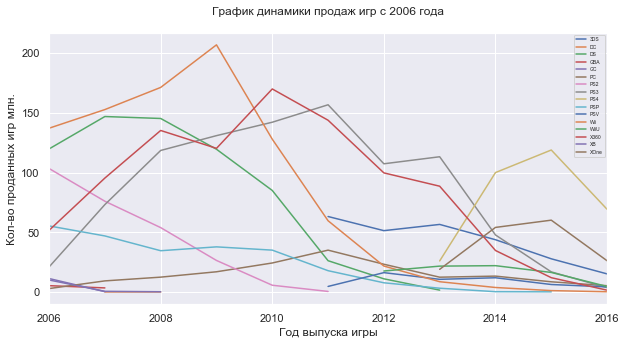

In [991]:
# Построим график распределения продаж игр в млн. копий по всем платформам с 2006 года.
sns.set()
df_games.query('year_of_release >= 2006').pivot_table('all_sales', index='year_of_release', columns='platform', aggfunc='sum') \
    .plot(figsize = (10,5));
plt.title('График динамики продаж игр с 2006 года' + "\n")
plt.legend(fontsize=5)
plt.xlabel('Год выпуска игры')
plt.ylabel('Кол-во проданных игр млн.');

In [992]:
df_games.query('year_of_release >= 2013').pivot_table('all_sales', index='year_of_release', columns='platform', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


    Из графика мы можем сделать следующие выводы. Во-первых, на 2013 год приходится начало радикального падения некоторых наиболее продаваемых (за весь период) платформ и начало роста нескольких наиболее продаваемых платворм (на 2016 год), значения которых не нулевые на конец 2016 года. Во-вторых, мы из графика и сводной таблицы мы наблюдаем наиболее перспективную динамику продаж на 2017 год - по меньшей мере, для двух свежих (ворвавшихся на рынок в 2013 году) игровых платформ PS4 и XOne, стартовавших с чрезвычайно скромных показателей в 2013-м, но обогнав по продажам игры для платформ-лидеров, доминирующих с 2006 года. Не меньший интерес вызывает еще одна платформа 3DS - она несколько старше, пик продаж игр для этой платформы приходятся на старт в 2011 году, затем наблюдается пологое рановмерное снижение, однако в 2016 год эта платформа входит в тройку лучших плюсовых показтелей - платформа кажется перспективной в прогнозировании продаж на 2017-й год, принимая во внимание тот факт, что за 2016 год - данные, очевидно, по насыщенности не полные! Остальные платформы в интервале с 2013 года (их 8: DS, PC, PS3, PSP, PSV, Wii, WiiU, X360) - существуют на рынке довольно давно и были лидерами продаж в предыдущие годы (средни этих платформ есть те, которые вошли в топ-5 продаж с 1980-го года), однако с 2011 года - переживали постепенное или драматическое падение в продажах до минимальных значений, стремящихся к нулю). Среди этих платформ наиболее драматическую девальвацию пережили две платформы PS3 (PlayStation 3) и X360 (Xbox 360) - знакомые с отроческих лет, некогда популярные игровые консоли с джойстиком и разъемами для дисков. Не удивительно, что топ-2 лидера на 2016 год - это версии этих консолей следующего поколения (PlayStation4 и Xbox One). Это также объясняет, что предыдущие консоли с выходом новой постепенно демпенгуют на рынке сами производити, снижая или останавлиявая техническую поддержку, выпуск экземпляров консолей и стимулируя продажи игр для нового поколения консолей с большими операционными требованиями. 

    Построим "ящик с усами" - диаграммы размаха - по глобальным продажам трех наиболее перспективных игровых консолей

In [993]:
# Отфильтруем датасет по дате выпуска игры с 2013 года, сохраним финальный датасет в новую переменную
games_final = df_games.query('year_of_release >= 2013')
games_final.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,T,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [994]:
# Сохраним в новую переменную отфильтрованные значения с игровыми платформами - лидерами на 2016 год
games_liders = games_final.loc[(games_final['platform'] == "PS4") | (games_final['platform'] == "XOne") | (games_final['platform'] == "3DS")]
games_liders


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,T,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,7.8,T,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,68.0,7.4,T,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,T,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,68.0,7.4,T,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,68.0,7.4,M,0.01


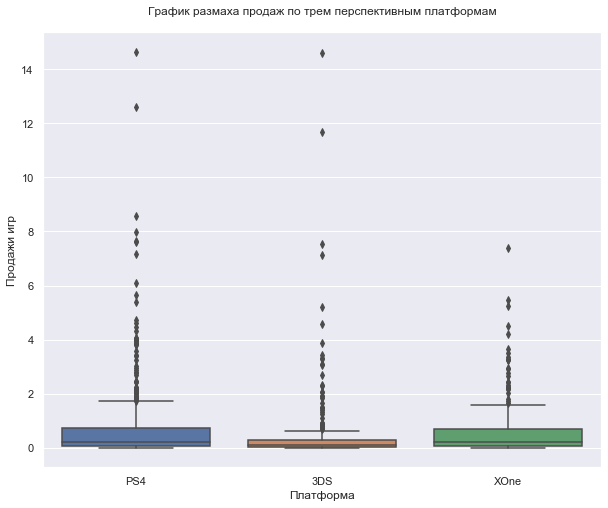

In [995]:
# Построим диаграмму размаха продаж игр для трех топовых консолей 
sns.boxplot(x = 'platform', y = 'all_sales', data = games_liders)

plt.title('График размаха продаж по трем перспективным платформам' + "\n")
plt.xlabel('Платформа')
plt.ylabel('Продажи игр');

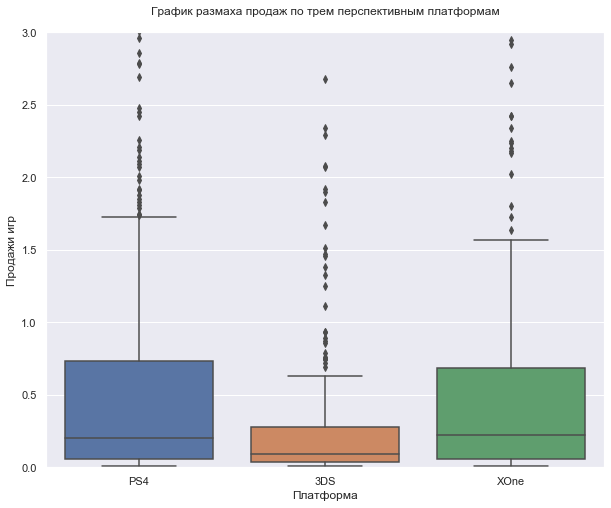

In [996]:
# Ограничим вариативность значений продаж до 3 млн. копий для наглядности сравнения средних / медиан
sns.boxplot(x = 'platform', y = 'all_sales', data = games_liders)

plt.ylim(0, 3)
plt.title('График размаха продаж по трем перспективным платформам' + "\n")
plt.xlabel('Платформа')
plt.ylabel('Продажи игр');

In [997]:
# Выведем описательную статистику по продажам игр перспективных платформ
games_liders.pivot(columns='platform', values='all_sales').describe()

platform,3DS,PS4,XOne
count,303.000000,392.000000,247.000000
mean,0.472772,0.801378,0.645020
std,1.381347,1.609456,1.036139
min,0.010000,0.010000,0.010000
25%,0.040000,0.060000,0.060000
50%,0.090000,0.200000,0.220000
75%,0.280000,0.730000,0.685000
max,14.600000,14.630000,7.390000


    Из графиков диаграммы размаха и описательной статистики мы можем наблюдать следующее. Первое, наиболее продаваемые игры, несмотря на статистические выбросы, у платформ PlayStation4 и Xbox One - средние у них (примерно 800 и 650 тысяч копий), в отличии от Nintendo 3DS - примерно 473 тысячи копий. Границы ящика (25-го и 75 процентилей), а также усов (1.5 межквартильных размаха) у PlayStation4 и Xbox One очень близки (75% игр продано в количестве 730 тыс. и 685 тыс. копий соответственно). Между тем, наиболее продаваемые хиты - экстремально высокие значения продаж (выбросы) - наблюдаются у платформ Nintendo 3DS и PlayStation4 (в максимальных значениях примерно до 14.6 млн проданных копий для обоих консолей). Наибольшая вариативность в продажах наблюдается у PlayStation4 - в 1.6 млн стандартного отклонения (на этот показатель, безусловно, влияет наличие статистических выбросов во всех платформах - медианы для трех платформ смещены к 25-му процентилю). 

    Приступим к оценке влияния на продажи игр - отзывов пользователей и критиков 

In [998]:
#  Подготовим таблицы для рассчета с выборочными переменными
df_games_corr = games_final[['name', 'platform', 'critic_score', 'user_score', 'all_sales']]
df_games_corr_lider = df_games_corr.loc[(df_games_corr['platform'] == "PS4") | (df_games_corr['platform'] == "3DS") | (df_games_corr['platform'] == "XOne")]
df_games_corr_lider

,name,platform,critic_score,user_score,all_sales
31,Call of Duty: Black Ops 3,PS4,73.0,7.4,14.63
33,Pokemon X/Pokemon Y,3DS,74.0,7.8,14.60
42,Grand Theft Auto V,PS4,97.0,8.3,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,74.0,7.8,11.68
77,FIFA 16,PS4,82.0,4.3,8.58
...,...,...,...,...,...
16648,Mushi Bugyou,3DS,68.0,7.4,0.01
16660,Prison Architect,XOne,74.0,6.7,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,68.0,7.4,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,68.0,7.4,0.01


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


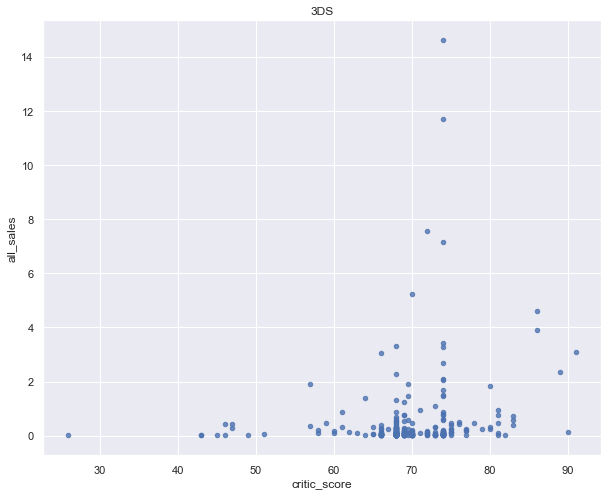

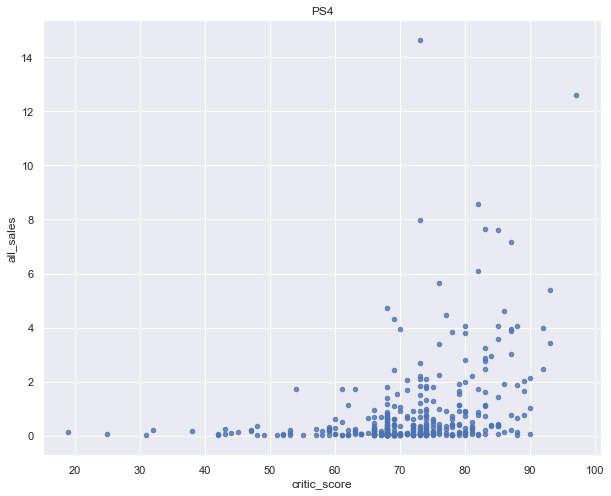

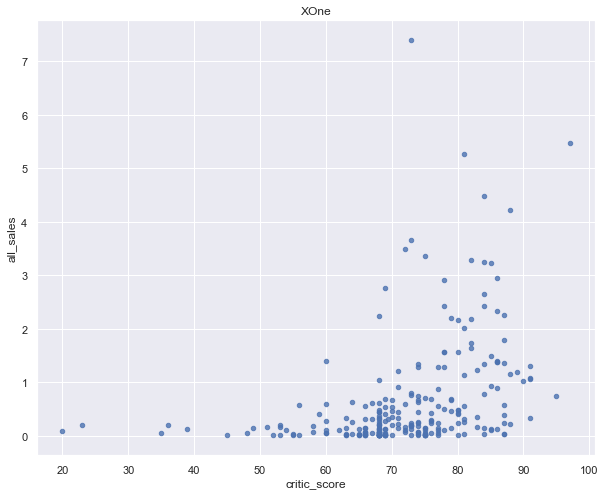

In [999]:
# Выведем через цикл диаграммы рассения для значений оценнки критиков и глобальных продаж, чтобы оценить характер и направление связи
# между переменными
for name, group_data in df_games_corr_lider.groupby('platform'):
    group_data.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.8, title = name)

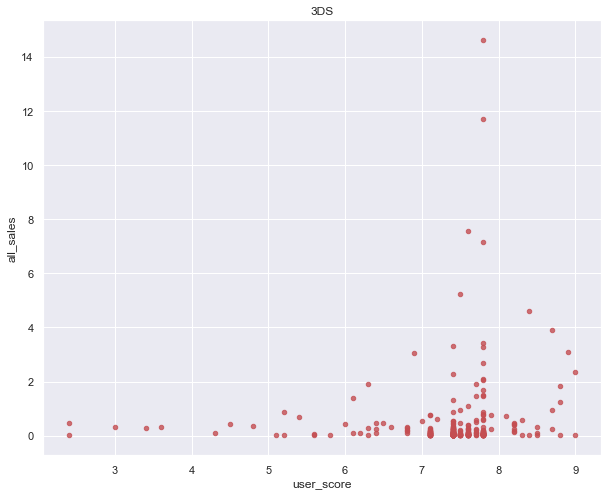

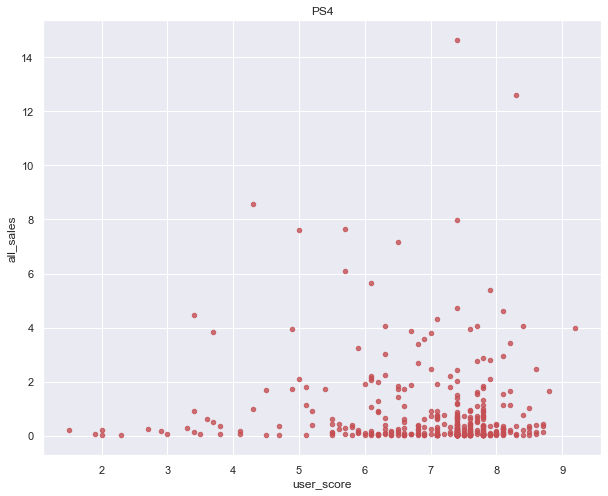

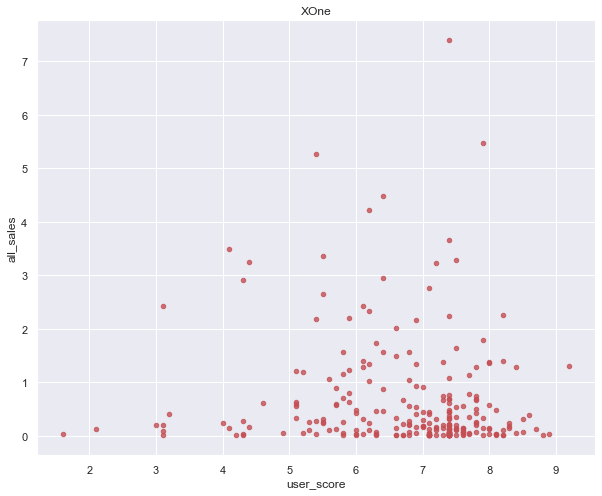

In [1000]:
# Выведем через цикл диаграммы рассения для значений оценнки пользователей и глобальных продаж, чтобы оценить характер и направление связи
# между переменными
for name, group_data in df_games_corr_lider.groupby('platform'):
    group_data.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.8, c='r', title = name)

    Посчитаем корреляции для трех перспективных игровых платформ - оценим силу связи между переменными 

In [1001]:
# Общая связь
df_games_corr.corr()['all_sales'].sort_values(ascending=False)

all_sales       1.000000
critic_score    0.280646
user_score     -0.058492
Name: all_sales, dtype: float64

In [1002]:
# Для 3DS
df_games_corr.query('platform == "3DS"').corr()['all_sales'].sort_values(ascending=False)

all_sales       1.000000
critic_score    0.178477
user_score      0.107982
Name: all_sales, dtype: float64

In [1003]:
# Для PlayStation4
df_games_corr.query('platform == "PS4"').corr()['all_sales'].sort_values(ascending=False)

all_sales       1.000000
critic_score    0.351474
user_score     -0.065482
Name: all_sales, dtype: float64

In [1004]:
# Для XboxOne
df_games_corr.query('platform == "XOne"').corr()['all_sales'].sort_values(ascending=False)

all_sales       1.000000
critic_score    0.378617
user_score     -0.105157
Name: all_sales, dtype: float64

    В результате корреляционного анализа (коэфф. корр. Пирсона) мы пришли к контринтуитивным выводам о том, что статистическая свзяь между пользовательской / экспертной оценкой игр и кол-вом проданных экземпляров в интервале с 2013 по 2016 гг. - весьма слабая, либо отсутствует совсем. Так, в целом, для всех платформ в релевантном для анализа интервале коэффициент корреляции для оценки критиков: 0.28 (очень слабая положительная связь), для пользовательских оценок: -0.05 (связь отсутствует). Этот тренд характерный для оцениваемых нами трех перспективных платформ.
    
    Итак, наиболее сильной положительной связью и очень слабой отрицательной (ближе к отсутствии связи) обладают платформы PS4 и XOne, для платформы 3DS - в обоих случаях очень слабая положительная связь (ближе к отсутствии связи) как в оценке критиков, так и пользовательских оценках. Слабая корреляция может объясняться следующими характеристиками данных: Во-первых, чрезвычано высокий разброс данных (наличие статистических выбросов и большого количества экстремально высоких значений в продажах для игр-хитов всех трех платформ) при относительно небольшого объема подвыборок (общий объем выборки сводится всего лишь к 2233 наблюдениям, а в срезе трех перспективных платформ - вего лишь 942. Во-вторых, неполнота данных на 2016 год - за этот год сильно меньше наблюдений, чем за другие годы в пропорциональном отношении - за наблюдаемый период к 2016 году все показатели продаж стремятся к нулю или просто планомерно падают. В-третьих, некоторая погрешность данных, полученная в результате аппроксимации медианными значениями по жанрам более 50 % (в общей сложности) пропущенных значений пользовательских оценок. 
    
    Тем не менее, несмотря на слабую отрицательную или отсутствующую связь между продажами и пользовательскими оценками, оценки критиков все же примерно на 35% рост продаж - однако в рамках корреляционного анализа о силе связи однозначно утверждать нельзя - не релевантный метод. 
    
    Еще одной примечательной особенностью характера связи между переменными является следующая: пользовательские и экспертные рейтинги в большей степени определяют продажи игр-хитов, значения которых выходят за пределелы продаж в 3-4 млн. копий, нежели менее популярные игры. Видимо здесь срабатывает эффект "самоисполняющегося пророчества" - легендарные игры своим лейблом стимулируют внимание адутитории и критиков, внимая оценки и определея их величину. Здесь же срабатывает эффект -масштабирования оценки. Так, у всех топовых игр, в зависимости от пользовательской, экспертной оценки, растет кол-во продаж, тем не менее, у существенной части высокорейтинговых игр продажи - чрезвычайно не велики. 

In [1005]:
# Отфильтруем датасет от строк с играми для платформ-лидеров и сохраним датафрейм в отдельную переменную
df_games_corr_no_lider = df_games_corr.loc[~(df_games_corr['platform'] == "PS4") & ~(df_games_corr['platform'] == "3DS") & ~(df_games_corr['platform'] == "XOne")]
df_games_corr_no_lider

,name,platform,critic_score,user_score,all_sales
16,Grand Theft Auto V,PS3,97.0,8.2,21.05
23,Grand Theft Auto V,X360,97.0,8.1,16.27
60,Call of Duty: Ghosts,X360,73.0,2.6,10.24
69,Call of Duty: Ghosts,PS3,71.0,2.6,9.36
72,Minecraft,X360,69.0,7.1,9.18
...,...,...,...,...,...
16703,Strawberry Nauts,PSV,66.0,7.6,0.01
16707,Aiyoku no Eustia,PSV,69.0,7.1,0.01
16710,Samurai Warriors: Sanada Maru,PS3,68.0,7.4,0.01
16712,Haitaka no Psychedelica,PSV,66.0,7.6,0.01


    Посчитаем корреляции для остальных игровых платформ в интервале с 2013 года - оценим силу связи между переменными

In [1006]:
# Посчитаем общую корреляцию для остальных игровых платформ
df_games_corr_no_lider.corr()['all_sales'].sort_values(ascending=False)

all_sales       1.000000
critic_score    0.250081
user_score     -0.081701
Name: all_sales, dtype: float64

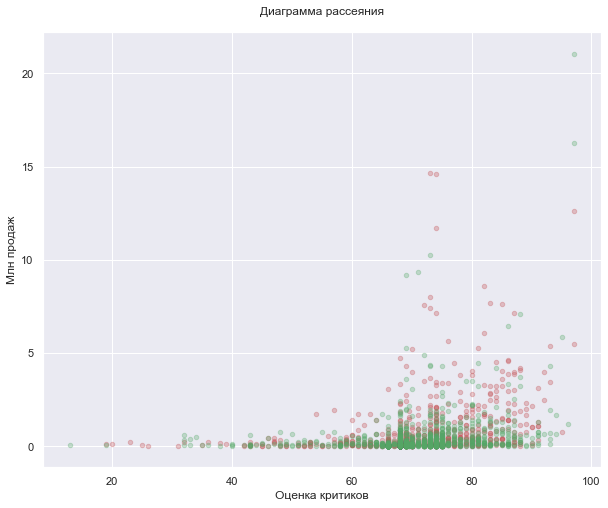

In [1007]:
#  Построим сводную диаграмму рассеяния для всех платформ-лидеров и всех платформ - не лидеров продаж с 2013 года
ax = df_games_corr_lider.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3, c="r")
df_games_corr_no_lider.plot(ax=ax, x='critic_score', y='all_sales', kind='scatter', alpha=0.3, c="g")
plt.title('Диаграмма рассеяния'+ "\n")
plt.xlabel('Оценка критиков')
plt.ylabel('Млн продаж')

plt.show()

    Не высчитвая для каждой из множества платформ корреляцию, в целом, можно сделать вывод, что тренд, полученный на перспективных платформах воспроизводится на альтернативных. 

    Теперь обратимся к статистике распределения игровых жанрах по играм с 2013 по 2016 гг. Построим линейный график распределения продаж игр разных жанров по годам для трех наиболее релевантных для прогнозирования продаж в 2017 году платформ. Так как эти платформы занимают большую долю в продажах игр, динамика по этим платформам будет очень близка динамике по всем платформам для релевантного периода с 2013 года.

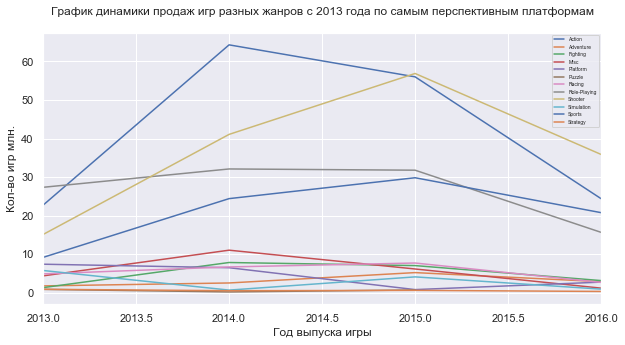

In [1008]:
# Построим график, отображающий динамику продаж игр разных жанров в разбивке по наиболее релевантным для 2017 года платформам
sns.set()
games_liders.pivot_table('all_sales', index='year_of_release', columns='genre', aggfunc='sum') \
    .plot(figsize = (10,5));
plt.title('График динамики продаж игр разных жанров с 2013 года по самым перспективным платформам' + "\n")
plt.legend(fontsize=5)
plt.xlabel('Год выпуска игры')
plt.ylabel('Кол-во игр млн.');

In [1009]:
# Выведем описательную статистику для точности интерпретации графика
games_liders.pivot_table('all_sales', index='year_of_release', columns='genre', aggfunc='sum').describe()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,41.862500,3.087500,4.827500,5.680000,4.352500,0.583333,5.482500,26.727500,37.237500,2.862500,21.042500,0.577500
std,21.420639,1.487848,3.113758,4.116463,3.107683,0.349905,2.207901,7.691495,17.252027,2.483766,8.752681,0.233006
min,22.710000,1.760000,1.310000,1.180000,0.800000,0.190000,2.670000,15.660000,15.100000,0.670000,9.160000,0.320000
25%,23.977500,2.330000,2.682500,3.565000,2.255000,0.445000,4.327500,24.427500,30.685000,0.857500,17.867500,0.462500
50%,40.210000,2.690000,5.085000,5.255000,4.610000,0.700000,5.780000,29.570000,38.480000,2.510000,22.590000,0.555000
75%,58.095000,3.447500,7.230000,7.370000,6.707500,0.780000,6.935000,31.870000,45.032500,4.515000,25.765000,0.670000
max,64.320000,5.210000,7.830000,11.030000,7.390000,0.860000,7.700000,32.110000,56.890000,5.760000,29.830000,0.880000


    Из графиков и описательной статистике мы можем сделать следующие выводы: Во-первых, все жанры хорошо разбиваются на три категории: самые популярные, весьма востребованные и довольно не популярные. К самым популярным (они же самые прибыльные жанры) можно отнести Action, Shooter., К весьма востребованным (также прибыльным) - Role-Playing, Sports., Здесь примечательно, что в 2013 году - самой популярным жанром являлись игры жанра Role-Playing (ролевые) - однако, их продажи просели к 2016 году. Затем до 2015 года - резко пошли вверх продажи игр жанра Action, однако к 2016 - лидером стали "Боевые действия, стрелялки".

    Все остальные жанры - в наименьшей степени прибыльные игры. Все это довольно предсказуемо, принимая во внимание масштабы целевой аудитории более "серьезных" с точки зрения развития сжета, стратегии и вовлечения игр. Музыкальные, развивающие игры - имеют весьма узкую целевую аудиторию в виде детей. 


### Промежуточные выводы

    Основная цель данного раздела - Во-первых определить релевантный объем данных (временной и содержательный) для прогнозирования продаж игр на 2017-й год. Во-вторых, выявить первичные закономерности в отфильтрованных для прогноза данных в следующих характеристиках игр: платформ, для которых они выпущены, объема глобальных продаж, жанровой специфики, а также таких теоретических детермененант продаж, как оценка критиков и пользовательская оценка.

    Итак, в рамках этого раздела мы пришли к следующим результатам:
        Во-первых, определили наиболее релевантный для анализа временной интервал: с 2013 по 2016 гг. - именно на этот период приходится градиентное или драматическое исчезновение игр для старых платформ и появляются игры для новых, значения которых калькулируются на 2016 год. В рамках этого временного интервала мы выделили 3 наиболее перспективные для прогноза игровые платформы по двум критериям - 1) их пик продаж приходится на выделенный интервал, 2) их значения продаж не стремятся к нулю за 2016-й год. Под эти критерии подошли две платформы, показавшие хорошую динамику продаж с 2013 года: PlayStation 4 (PS4) и Xbox One (XOne) - это новые версии двух легендарных консолей. В выборку лидеров также попала платформа 3DS - довольно популярной в азиатских странах платформы Nintendo - несмотря на то, что пик продаж этой платформы приходится на старт (год выпуска) 2011-й, эта платформа продемонстрировала хорошие положительные результаты на 2016-й год - около 15 млн. проданных копий игр. Остальные платформы с 2013-го года - их 8 - шесть из восьми которых имеют довольно длинную историю с 2006-го года - продемонстрировали чрезвычайно низкие показатели продаж на 2015-е - 2016 е гг - от нескольких сотен тысяч до пяти миллионов копий. Некоторые из этих платформ являлились лидерами по продажам с 2006 года, но экстремально упали в продажах - например, легендарная консоль Xbox 360. Возможно, это произошло ввиду нескольких реноваций этой консоли для игр нового поколения с поддержкой WiFi и возможностью хранения купленных игр на Интернет-платформах в харнилище, или облаке. 
        Во-вторых, мы исследовали разброс значений глобальных продаж для трех наиболее перспективных платформ и определили: 1) с точки зрения средних продаж лидируют платформы PS4 и XOne - у диаграммы размаха этих значений очень близки границы межквартильного размаха и даже 1.5 межквартильных размаха (в среднем 800 и 645 тыс. проданных игр под эти платформы). 2) с точки зрения меры изменчивости продаж, выделяются платформы PS4 и 3DS - у этих платформ в наличии бОльшее количество игровых "хитов" с экстремально высокими показателями продаж, выходящих за пределы 1.5 межквартильных размаха (примерно по 14.6 млн. проданных копий игр, соответственно) - у XOne максимальные продажи игр не достигают и 8 млн. Отдельный интерес заслуживает исследование этих наиболее популярных игр, имидж которых всегда тесно связан с консолью, под которую игра выпущена - что касается звездных игр.
        В-третьих, мы провели корреляционный анализ для статистической оценки влияния оценки критиков и пользовательских оценок на продажи игр трех наиболее перспективных платформ и сравнили эти результаты с корреляционным анализом для всех остальных платформ, попавших в выборку с 2013 года. В рамках этого анализа мы пришли к чрезвычайно контр-интуитивному выводу: корреляционная линейная связь между предикторами (оценка критиков и пользователей) и продажими - либо чрезвычайно слабая (от 0.2 до 0.35) для оценки критиков, либо совсем отсутствует либо слабо-отрицательная (от -0.1 до 0.1). Ни о силе, ни о направлении связи в рамках корреляционного анализа мы с уверенности рассуждать не можем, но лишь говорим, что показатели продаж имеют определенно слабую совместную встречаемость с показателями оценок пользователей и критиков. Здесь наиболее сильная связь продаж с оценкой критиков (около 0.4) и, в то же время, наиболее сильная обратная связь с пользовательскими оценками (-0.1) наблюдается у платформы  Xbox One - похожие, но ниже, коэффициенты у PlayStation4. Однако, благодаря диаграммам рассеяния мы обнаружили, что в наибольшей степени пользовательские оценки и (особенно!) оценке критиков определяют продажи игровых "хитов", продажи которых превышают 3-4 млн. Что же касается сравнения с корреляционным анализом для игр других платформ, то по всем им тренд, определенный на лидерах, сохраняется - по всем платформам коэффициент корреляции Пирс-на между оценкой критиков и продажами - слабо положительный (в районе 0.2), между пользовательскими оценками и продажами (либо отсутствует ли слабо отрицательный). Очевидно, оценки критиков и пользователей являются слабо определяющим фактором востребованности, по меньшей мере, не очень популярных игр для платформ лидеров. Если и есть фактор влияния - то это оценка критиков. 
        В-четвертых, за релевантный временной интервал для платформ-лидеров мы выделили три сегмента востребованности игровых жанров: "Лидеры продаж" - жанры: Action, Shooter ; "Популярные" - жанры: Role-Playing, Sports ; "Не востребованные" - жанры: "Приключения", "Борьба", "Музыка", "Стратегия", "Симуляция" и т.д - последние, очевидно, имеют либоч чрезвычайно профильную, либо очень узкую возрастную целевую аудиторию - предметно интересующихся взрослых (стратегии) и детей (3-7+) - игры для которых покупают родители. Что касается популярных жанров, то примечательно, что жанр "Role-Playing" был наиболее востребованной платформой в 2013 году, однако за весь период он едва ли набрал 32 млн продаж - его рост был градентныо поступальным, пологим, а с 2015 начал снижение (в отличии от жанра Action - который выбился в лидеры уже в 2014 году со своими 64 млн. продаж, уступив в 2015-м году первенство жанру "Стрелялки" в 2015-16-х гг.

## Шаг 4. Составить портрет пользователя каждого региона

    На данном этапе нам предстоит определить для пользователей каждого региона Северной Америки, Европы, Японии: 1) топ-5 самых популярных платформ (какие платформы в каких регионах наиболее продаваемы?), 2) топ-5 самых популярных жанров? (какие жанры в каких регионах наиболее востребованы?), 3) Определить, влияет ли рейтиyu ESRB на продажи игр в отдельном регионе.

In [1010]:
# Сгруппируем данные по плфтформам и продажам по странам Северной Америки
na_sales = games_final.groupby(['platform'], as_index=False).agg({'na_sales': 'sum'}) \
    .sort_values(by='na_sales', ascending=False).reset_index(drop=True)
na_sales

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,WiiU,29.21
6,PC,11.11
7,Wii,6.56
8,PSV,5.04
9,DS,0.57


In [1011]:
# Посчитаем и добавим долю продаж
na_sales['dolya'] = na_sales['na_sales'] / na_sales['na_sales'].sum()

In [1012]:
na_sales.head(5)

,platform,na_sales,dolya
0,PS4,108.74,0.248429
1,XOne,93.12,0.212744
2,X360,81.66,0.186562
3,PS3,63.50,0.145073
4,3DS,38.20,0.087272


In [1013]:
#  Посчитаем суммарные продажи игр по разным платформам в странах Европы.
eu_sales = games_final.groupby(['platform'], as_index=False).agg({'eu_sales': 'sum'}) \
    .sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
eu_sales

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96
5,PC,25.36
6,WiiU,19.85
7,PSV,6.10
8,Wii,5.93
9,DS,0.85


In [1014]:
# Добавим долю от всех продаж по региону
eu_sales['dolya'] = eu_sales['eu_sales'] / eu_sales['eu_sales'].sum()

In [1015]:
eu_sales.head(5)

,platform,eu_sales,dolya
0,PS4,141.09,0.359712
1,PS3,67.81,0.172883
2,XOne,51.59,0.131530
3,X360,42.52,0.108406
4,3DS,30.96,0.078933


In [1016]:
# Посчитаем суммарные продажи игр по разным платформам в актуальный период по Японии
jp_sales = games_final.groupby(['platform'], as_index=False).agg({'jp_sales': 'sum'}) \
    .sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
jp_sales

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
5,PSP,3.29
6,X360,0.51
7,XOne,0.34
8,Wii,0.05
9,DS,0.00


In [1017]:
# Добавим долю продаж по Японии
jp_sales['dolya'] = jp_sales['jp_sales'] / jp_sales['jp_sales'].sum()

In [1018]:
jp_sales.head(5)

,platform,jp_sales,dolya
0,3DS,67.81,0.481674
1,PS3,23.35,0.165862
2,PSV,18.59,0.132050
3,PS4,15.96,0.113368
4,WiiU,10.88,0.077284


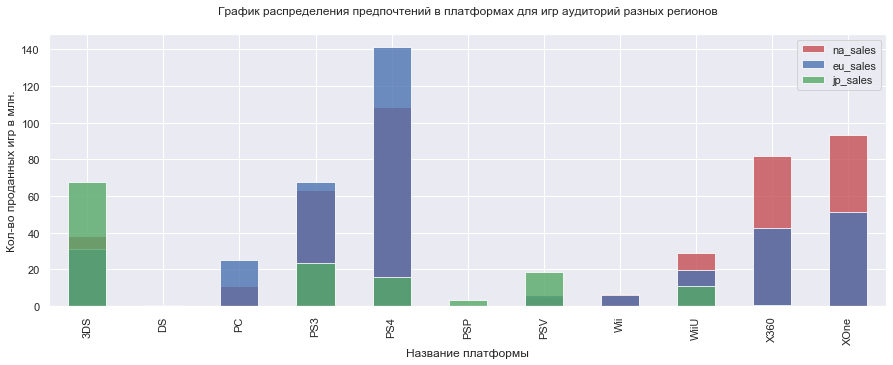

In [1019]:
# Выведем график распределения продаж по платформам по всем регионам
ax = games_final.groupby(['platform']).agg({'na_sales': 'sum'}).plot(kind='bar', grid=True, figsize=(15, 5), color = 'r', alpha=0.8)
games_final.groupby(['platform']).agg({'eu_sales': 'sum'}).plot(ax=ax, kind='bar', grid=True, figsize=(15, 5), color = 'b', alpha=0.8)
games_final.groupby(['platform']).agg({'jp_sales': 'sum'}).plot(ax=ax, kind='bar', grid=True, figsize=(15, 5), color = 'g', alpha=0.8)
plt.ylabel('Кол-во проданных игр в млн.')
plt.xlabel('Название платформы')
ax.set_title("График распределения предпочтений в платформах для игр аудиторий разных регионов", pad = 20);

    Итак, самыми популярными игровыми платформами в странах Европы и Северной Америки - весьма схожи - это игровые приставки PS4, XOne, X360, PS3, 3DS.  На первом месте в обоих регионах - PlayStation4 (доля -  от 36% всех продаж в Европе приходтся на игры для этой консоли, в Североной Америке - рынок более диверсифицирован - около 25%). Последнее место в пятерке занимают платформы 3DS - 7-8% продаж в обоих регионах. Вторые, третьи, четертые позиции - различаются, но нескколько блазированы в обоизх регионах. В Европе более востребованы игры на PS3 -более старую версию консоли этого вида (да и вообще на Play Sation) - аудитория более консервативная - , в то время как в Канаде и США, например, новая платворма Xbox One и Xbox360. 
    
    В Японии же ситуация совершенно обратная. Во-первых, в топ-5 попали платформы, не популярные в Европе и Америке - такие как PSV (от Sony - ручная консоль, выпущенной в 2011 г.) и WiiU (- запущенная в 2011 году игровая консоль от разработчика Nintendo - аналога 3DS - 5-го поколения - конкурента PlayStation3 и Xbox360). Рынок японских игровых приставок еще в большей степени смещенных к лидерам продаж, и здесь лидером становится самая непопулярная в Европе и Америке консоль 3DS (Nintendo) - почти 50% продаж (48%). PS4 теряет свои позиции до 11% продаж, PS3 cохраняет свои позиции на втором месте, обгоняя самую новую версию XboxOne. Вообще, с 2013 года данных о продажах в Японии не много - очевидно - для урбанизированной страны показатели в 10-ки млн продаж не соответствуют действительности.

    Обратимся к определению самых популярных жанрах по регионам в актуальный период (с 2013 по 2016 гг.)

In [1020]:
#  Построим сводные таблицы для Европы, Северной Америки и Японии - суммарных продаж по жанрам
games_final.groupby(['genre']).agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [1021]:
games_final.groupby(['genre']).agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [1022]:
games_final.groupby(['genre']).agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


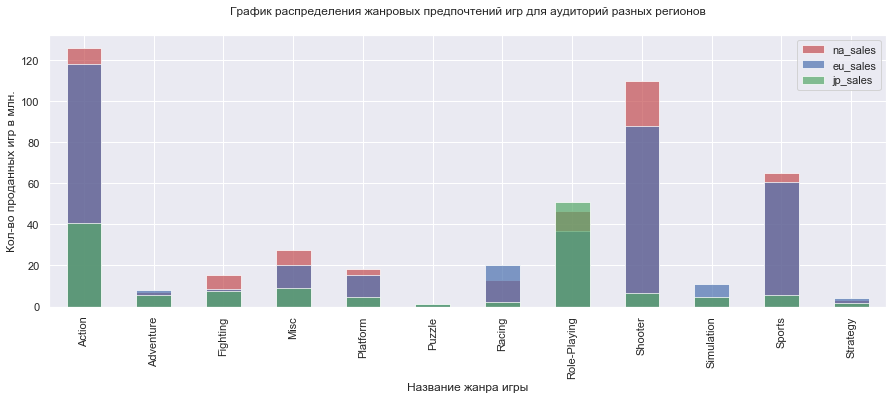

In [1023]:
# Выведем график распределения продаж по жанрам и по всем регионам
ax = games_final.groupby(['genre']).agg({'na_sales': 'sum'}).plot(kind='bar', grid=True, figsize=(15, 5), color = 'r', alpha=0.7)
games_final.groupby(['genre']).agg({'eu_sales': 'sum'}).plot(ax=ax, kind='bar', grid=True, figsize=(15, 5), color = 'b', alpha=0.7)
games_final.groupby(['genre']).agg({'jp_sales': 'sum'}).plot(ax=ax, kind='bar', grid=True, figsize=(15, 5), color = 'g', alpha=0.7)
plt.ylabel('Кол-во проданных игр в млн.')
plt.xlabel('Название жанра игры')
ax.set_title("График распределения жанровых предпочтений игр для аудиторий разных регионов", pad = 20);

    Итак, в Европе и Северной Америке наиболее продаваемые жанры игр распределились весьма схожим образом - и этот вывод соотносится с промежуточными результатами оценки динамики популярности жанров за актуальный период.
    Лидирующие позиции занимают жанры "Экшн" - эксплуатации физиеских возможностей игрока, на втором месте - стрелялки, последнии позиции топ-5 в Европе - жанр Музыка и Гонка - с целевой аудитории для детей. При этом, следует отметить, что в Северной Америке жанры "Экшн" и "Шутер" доминируют с существенным отрывом в мнл продаж.
    В Японии ситуация радикально отличается: на первом месте  Role-Playing - свойственный локальной культуре кост-плей - эксплуатация символических конструктов и образов, жанр "Экшн", как ни странно, также сохраняет свои лидирующие позиции. Стрелялки - тоже вошли в топ-5, но наименее востребованных, Музыкальные жанры и Борьба - привлекательные направления игр для Японцев. 

    Обратимся к оцнке влияния рейтинга ESRB на продажи игр в разных регионах.

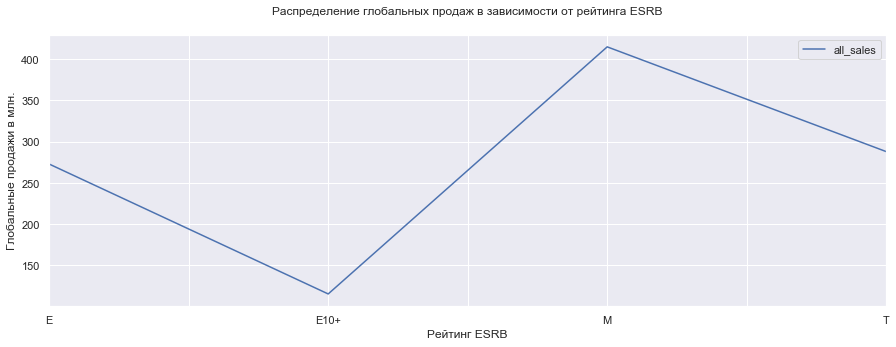

In [1024]:
# Построим простой линейный график с сумммарными продажами игр разных рейтингов за актуальный период, демонстрирующий общий тренд
ax = games_final.groupby('rating').agg({'all_sales': 'sum'}).plot(grid=True, figsize=(15, 5))
plt.ylabel('Глобальные продажи в млн.')
plt.xlabel('Рейтинг ESRB')
ax.set_title("Распределение глобальных продаж в зависимости от рейтинга ESRB", pad = 20);

    Подготовим сводные таблицы по рейтингам и продажам игр в разных регионах.

In [1025]:
na_rating_sales = games_final.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)
na_rating_sales

,na_sales
rating,
M,184.77
E,102.09
T,96.61
E10+,54.24


In [1026]:
eu_rating_sales = games_final.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)
eu_rating_sales

,eu_sales
rating,
M,162.21
E,108.37
T,78.96
E10+,42.69


In [1027]:
jp_rating_sales = games_final.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)
jp_rating_sales

,jp_sales
rating,
T,86.62
E,33.35
M,14.92
E10+,5.89


Text(0.5, 0, 'Категория рейтинга')

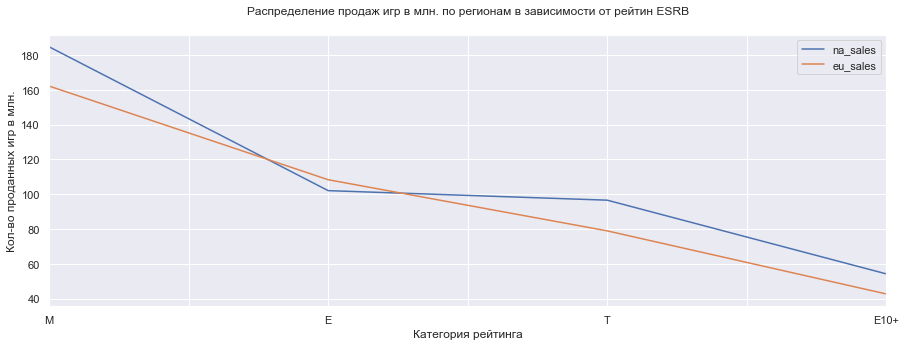

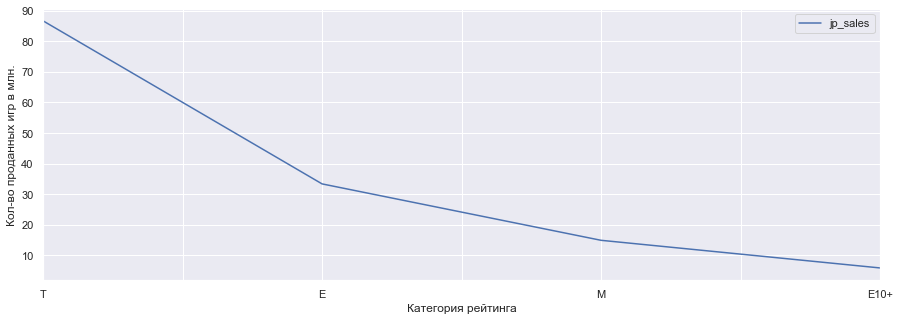

In [1028]:
ax = na_rating_sales.plot(grid=True, figsize=(15, 5))
eu_rating_sales.plot(ax=ax, grid=True, figsize=(15, 5))
plt.ylabel('Кол-во проданных игр в млн.')
plt.xlabel('Категория рейтинга')
ax.set_title("Распределение продаж игр в млн. по регионам в зависимости от рейтин ESRB", pad = 20);

jp_rating_sales.plot(grid=True, figsize=(15, 5))
plt.ylabel('Кол-во проданных игр в млн.')
plt.xlabel('Категория рейтинга')

    Категории переменной: «EC» («Early childhood») — «Для детей младшего возраста» (от 3 лет) «E» («Everyone») — «Для всех» (от 6 лет и старше) «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» «T» («Teen») — «Подросткам» (от 13 лет и старше) «M» («Mature») — «Для взрослых» (от 17 лет и старше) «AO» («Adults Only 18+») — «Только для взрослых» (от 18 лет и старше) «RP» («Rating Pending») — «Рейтинг ожидается»


    Из графиков и сводных таблиц по Европе и Северной Америке мы можем сделать следующий вывод - между возрастными коэффициентами M,E,T,E10 мы наблюдаем градиентное падение продаж. Между тем, на основе такого графика мы не можем однозначно утверждать о наличии-отсутствии связи. Так, вполне вероятно, что игры для взрослых (М) продаются исключительно количественно чаще, чем игры для "Детей от 10 лет и старше". Более того, в наших данных чрезвычайно много экстремально высоких показателей продаж легендарных (наиболее популярных игр), которые могут смещать график распределения своими  ESRB (взрослыми - М) рейтингами.

    Тем не менее следует следать вывод, что игры, маркированные возрастное спецификой - будь то E10+ (от 10 лет) и T(Подростки) - продаются реже, чем игры "для взрослых". Во-первых, кол-во взрослых, покупающих игры, в обществе больше, чем детей и их родителей, совершающих им соответствующие покупки. Во-вторых, даже дети любят игры жанра Action, Shooter - чаще всего маркированными как игры для "взрослых" (AO | M) - ввиду наличия сцен насилия и других откровенных сцен в играх. Здесь срабатывает фактор жанра игры, как детерминирующего сами рейтинги ESRB.

    Что же касается ситуации в Японии, то она несколько отличается. Самыми продаваемыми играми становятся игры "для подростков" (T) - этот факт обусловлен, скорее всего, жанровыми предпочтениями японцев разных возрастных групп игр - например, кост-плей, аниме. В то время как игры для взрослых являеются в меньшей степени востребованными. Здесь сложно судить о жанровой специфици, ввиду того, что игры жанра action  также попали в топ-5 востребованных игр в Японии - но из-за недостатка данных с 2013 года довольно сложно судить, вошли бы игры этого жанра в 5-ку, если бы данных было больше. Так или иначе, игр рейтинга м - номинально продано меньше (таких жанров как Action, Shooter). Поэтому здесь мы тоже не можем говорить об определяющем факторе рейтинга ESRB.

## Промежуточный вывод

    Этот раздел посвящен исследованию региональной специфики продаж игр разных жанров и платформ (сравнительный анализ стран Северной Америки, Европы, Японии). 
    В промежуточном выводе этого раздела мы сконцентрируемся на выражении некоторых наиболее интересных особенностей региональных игровых рынков. 
    1. Аудитория Японии имеет приверженность играм ручных консолей, набравших популярность в 2000-х. Типа WiiU и PSV (от Sony) - это относительно новые версии ручных консолей, выпущенные в 2011 году (некоторые из которых 5-го поколения). 
    2. Аудитория Европы и северной Америки имеют схожие потребительские установки и предпочитают, в той или иной степени приставки PS4, XOne, X360, PS3, 3DS (т.е. как новые, так и старые версии). Между тем, Европейцы в больше степени консервативны и отдают предпочтение продукции PlayStation, в то время как Американцы - имеют более дифференцированные предпочтения, но предпочитают Xbox той или иной версии.
    3. Именно на Японцах мы сделали вывод о том, что приверженность жанру определяет выбор консоли, в то время как нельзя однозначно утверждать о влиянии рейтинга ESRB  на продажи (в Японии наиболее популярны игры для подростков, исходя из данных этого рейтинга, хотя на самамом деле, Японцы просто обожают игры кост-плей вне зависимости от конвенциональной возрастной специфики этой игры).

## Шаг 5. T-test. Сравнение средних двух независимых выборок.

    Для того, чтобы удостовериться в валидности данных, на основе которых мы планируем прогнозировать продажи игр на 2017 год., проведем несколько t-теста на сравнение средних, например, пользовательских рейтингов по разным платформам и жанрам. 
    В качестве платформ отберем одну из трех самых популярных с 2013 года (но не самую востребованную) - XOne (Xbox One), а также одну из попавших в временной интервал, но потерявшую востребованность платформу PC - то есть игры для персонального компьютера!
    В качестве жанров определим акутального лидера в продажах жанра "Action" и с некоторой дианмикой поднимающегося (в смысле продаж) жанра "Sports"

    Итак, t-тест для проверки статистического равенства средних в пользовательских оценках двух генеральных совокупнойстей (XOne, PC) на основе подвыборок - пользовательских оценок с 2013 года игр для платформ Xbox One и Personal Computer 

    Перед тем, как применять t-тест, нужно учесть два входных требования:
    а) Требование гомогенности дисперсии (дисперсии внутри групп должны быть примерно одинаковы)
    б) Если объем выборки недостаточно большой (меньше 30 - граница объема выборки весьма условная, но конвенциональная!), то важно соблюдать требование о нормальности распределения двух выборок.

    Таким образом, перед проведением теста оценим объем подвыборок, меру изменчивости интересующего нас признака (дисперсия, стандартное отклонение), посмотрим на распределение признака (оценим форму и тип).

    NB! Ввиду того, что релевантный для анализа временной интервал в дополнении к срезу по конкретным платформам и жанрам исключает существенную часть выборки, что негативно сказывается на нормальность распределения (чем больше выборка, тем больше выборочные средние распределены нормально относительно эмпирического среднего и стремятся к нему).

In [1029]:
# Оценим кол-во наблюдений в датафрейме по плафторме XOne
print('Датафрейм для Xbox One с 2013 по 2016 гг. содержит', len(games_final.query('platform == "XOne"')) , 'строк наблюдений')

Датафрейм для Xbox One с 2013 по 2016 гг. содержит 247 строк наблюдений


In [1030]:
# Оценим кол-во наблюдений в датафрейме по плафторме PC
print('Датафрейм для PC с 2013 по 2016 гг. содержит', len(games_final.query('platform == "PC"')) , 'строк наблюдений')

Датафрейм для PC с 2013 по 2016 гг. содержит 189 строк наблюдений


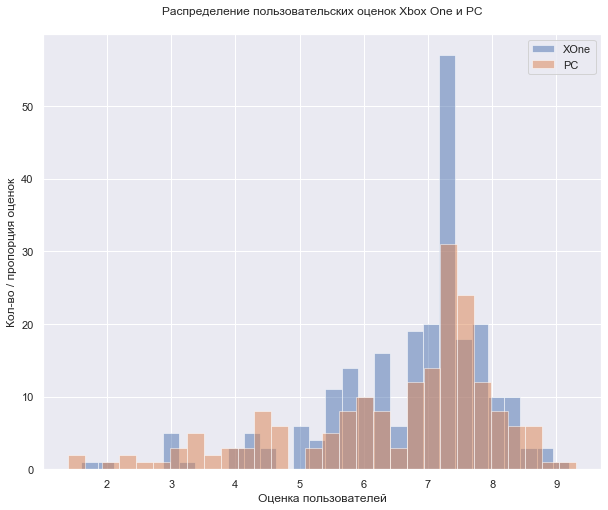

In [1031]:
# Построим совместный график распределения пользовательских оценок по платформам Xone и PC
ax = plt.hist(x=games_final.query('platform == "XOne"')['user_score'], bins=30, label  = 'XOne', alpha=0.5)
plt.hist(x=games_final.query('platform == "PC"')['user_score'],  bins=30, label = 'PC', alpha=0.5)

plt.title("Распределение пользовательских оценок Xbox One и PC", pad = 20)
plt.ylabel('Кол-во / пропорция оценок')
plt.xlabel('Оценка пользователей')
 
plt.legend();

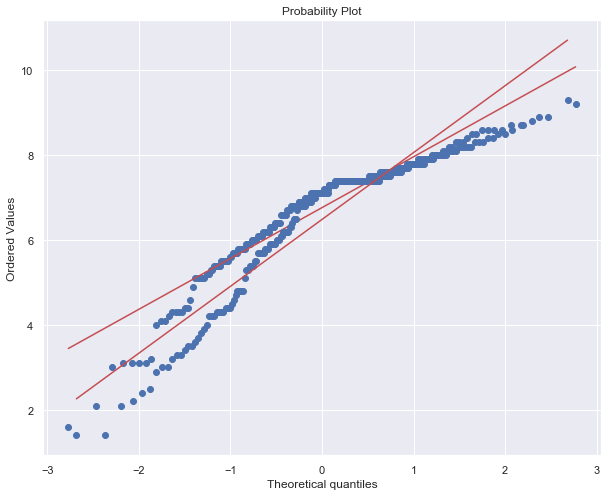

In [1032]:
# построим графики QQ-Plot для XOne, PC для оценки нормальности распределения.
stats.probplot(games_final.query('platform == "XOne"')['user_score'], dist="norm", plot=plt);
stats.probplot(games_final.query('platform == "PC"')['user_score'], dist="norm", plot=plt);

In [1033]:
# Посчитаем среднее, дисперсию и стандартное отклонение значений распределения пользовательских оценок для платформы XOne
np.mean(games_final.query('platform == "XOne"')['user_score'])

6.761538461538461

In [1034]:
np.var(games_final.query('platform == "XOne"')['user_score'])

1.5664154469012763

In [1035]:
np.std(games_final.query('platform == "XOne"')['user_score'])

1.2515651988215701

In [1036]:
# Посчитаем среднее, дисперсию и стандартное отклонение значений распределения пользовательских оценок для платформы PC

In [1037]:
np.mean(games_final.query('platform == "PC"')['user_score'])

6.483068783068779

In [1038]:
np.var(games_final.query('platform == "PC"')['user_score'])

2.687861482041377

In [1039]:
np.std(games_final.query('platform == "PC"')['user_score'])

1.6394698783574455

    Оба распределения пользовательских оценок не являются нормальными - несмотря на то, что по форме плотности распределения визуально весьма похожи: графики унимодальны, скошены вправо (несколько завышены оценки).
    Средние пользовательские оценки для платформ XOne и PC очень близки (примерно 6.8 и 6.5), однако, вариативность значений призака относительно среднего для Персонального Компьютера выше, чем у Xboxe (2.7 и 1.25 - дисперсия) 

    Отработаем требования для t-теста:
    а) Исходя из характеристик стандартного отклонения в описательной статистике по выручке, мы можем сделать вывод, что дисперсии двух выборок отличаются. Поэтому в самом t-тесте отметим неравенство дисперсий. 
    б) В наших выборках количество наблюдений сильно больше 30. Если наблюдений больше 30, то t-тест неплохо справляется с поставленной задачей даже если распределение внутри выборок отличается от нормального. Конечно, лучше избавиться от статистических выбросов (за пределами 1.5 межквартильных размаха - или за пределами 98-го процентиля) в данных о кол-ве продаж, для того, чтобы сгладить завышенные рейтинги для хитов-продаж. Между тем, мы рискуем исключить из выборки те самые популярные игры, которые хоть как-то демонстрируют связь между оценками и кол-вом продаж. 

    Теперь установим границы доверительного интервала, обозначив увроень значимости (p_value) = 0.05. Если значений p_value средних двух выборок будет лежать за границей 95% доверительного интервала, мы отклоним нулевую гипотезу о равенстве средних, в противном случае - опровергнуть не сможем. Значение p_value - момент критический. Принимая решение о значении p_value мы руководствуемся стремлением избежать ошибки 1-го (отклонили нулевую гипотезу, когда на самом деле она была верна) и 2-го рода (не отклонили нулевую гипотезу, хотя верна была альтернативная).

    Предельно артекулируем нулевую и альтернативную гипотезу
    H0: Средние значения пользовательских оценок для игр платформ "XOne" и "PC" не различаются (т.е. средние значение генеральной совокупности равны!)
    H1: Средние значения пользовательских оценок для игр платформ "XOne" и "PC" различаются (т.е. средние значение генеральной совокупности не  равны!)

In [1040]:
# Выведем результат t-теста
sample_1 = games_final[games_final['platform'] == 'XOne']['user_score'] 
sample_2 = games_final[games_final['platform'] == 'PC']['user_score'] 
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  0.05355232069397892
Опровергнуть нулевую гипотезу нельзя


    Исходя из результатов t-теста мы можем сделать довольно контр-интуитивный вывод о том, что, несмотря на разницу в кол-ве продаж игр для консоли X One и Персонального компьютера, средние пользовательские оценки для этих игр в релевантном для прогноза на 2017-й год временнойм диапазоне (с 2013 по 2016 гг. ) статистически не различаются. Однако, p_значение полученное в результате теста чрезвычайно чильно близко к 5% (0.0535 - отсает на тысячные). То есть, мы можем сделать следующий вывод: средний пользовательский рейтинг платформ XOne и PC отличается, но с вероятностью чуть более 5% такое различие можно получить случайным - то есть эта вероятность очень мала.  

    Теперь обратимся к статистической оценке равенства пользовательских оценок игр жанров "Action" и "Sports". Проделаем тем же шаги.

In [1041]:
# Оценим кол-во наблюдений в датафрейме по жанру Action
print('Датафрейм для Xbox One с 2013 по 2016 гг. содержит', len(games_final.query('genre == "Action"')) , 'строк наблюдений')

Датафрейм для Xbox One с 2013 по 2016 гг. содержит 766 строк наблюдений


In [1042]:
# Оценим кол-во наблюдений в датафрейме по жанру Sports
print('Датафрейм для Xbox One с 2013 по 2016 гг. содержит', len(games_final.query('genre == "Sports"')) , 'строк наблюдений')

Датафрейм для Xbox One с 2013 по 2016 гг. содержит 214 строк наблюдений


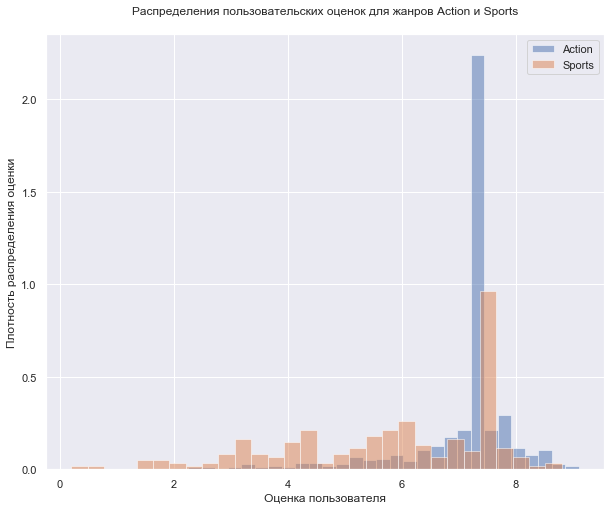

In [1043]:
# Построим график распределения пользовательских оценок для жанров Action и Sports
ax = plt.hist(x=games_final.query('genre == "Action"')['user_score'], bins=30, label  = 'Action', alpha=0.5, density=True)
plt.hist(x=games_final.query('genre == "Sports"')['user_score'],  bins=30, label = 'Sports', alpha=0.5, density=True)

plt.title("Распределения пользовательских оценок для жанров Action и Sports", pad = 20)
plt.ylabel('Плотность распределения оценки')
plt.xlabel('Оценка пользователя')
 
plt.legend();

    На графике видно, что для значений Action весьма сильно выбиваются значения оценки - около 7-8, что являются результатом заполнения пропусков медианными значениями по жанрам. Графики плотности распределения не являются нормальными. Для жанра Спорт згначения распределены равномено с пиком в районе 7.5 баллов, оценки жанра экшн выглядели бы нормально, если бы не существенный пик в районе 7.3 баллов. 

In [1044]:
# Посчитаем среднее, дисперсию и стандартное отклонение значений распределения пользовательских оценок для жанра Action
np.mean(games_final.query('genre == "Action"')['user_score'])

7.114360313315899

In [1045]:
np.var(games_final.query('genre == "Action"')['user_score'])

0.9753029197826548

In [1046]:
np.std(games_final.query('genre == "Action"')['user_score'])

0.9875742603888858

In [1047]:
# Посчитаем среднее, дисперсию и стандартное отклонение значений распределения пользовательских оценок для жанра Sports
np.mean(games_final.query('genre == "Sports"')['user_score'])

5.783644859813089

In [1048]:
np.var(games_final.query('genre == "Sports"')['user_score'])

3.244919425277314

In [1049]:
np.std(games_final.query('genre == "Sports"')['user_score'])

1.8013659887089337

    Предельно артекулируем нулевую и альтернативную гипотезу
    H0: Средние значения пользовательских оценок для игр жанра "Action" и "Sports" не различаются (т.е. средние значение генеральной совокупности равны!)
    H1: Средние значения пользовательских оценок для игр жанра "Action" и "Sorts" различаются (т.е. средние значение генеральной совокупности не  равны!)

In [1050]:
# Выведем результат t-теста
sample_1 = games_final[games_final['genre'] == 'Action']['user_score'] 
sample_2 = games_final[games_final['genre'] == 'Sports']['user_score'] 
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  3.832628984221931e-21
Принимаем альтернативную гипотезу


    Исходя из результатов t-теста мы можем сделать довольно контр-интуитивный вывод о том, что, несмотря на разницу в кол-ве продаж игр для двух популярных! жанров  Acion и Sports, средние пользовательские оценки для этих игр в релевантном для прогноза на 2017-й год временном диапазоне (с 2013 по 2016 гг. ) статистически также различаются. Этот важный вывод подтверждает соображение о том, что для игр - хитов продаж - пользовательские оценки в большей степени влиют на объем продаж (вывод, сделанный в предыдущем разделе). Исходя из выводов теста, непосредственно можно сделать вывод, что большей пользовательской популярностью пользуются игры жанра Action , нежели Sports (пользовательские оценки: 7.1 и 5.8 - соответственно).

## Общий вывод

    Аналитические выводы
    
    Остановимся в общих аналитических выводах на оценке релеватности отобранных данных (временного ряда и лидеров-платформ, а также жанров) для прогнозировании продаж в 2017-м году.
    
    Итак, в рамках проектной работы мы отобрали все игровые платформы с 2013-го года и определи 3 наиболее прибыльные / перспективные платформы по состоянию к 2016 году с относительно хорошей динамикой продаж. Исходя из данных, мы можем сделать вывод, что в 2017-м году наиболее продаваемыми платформами станут PlayStation4 и Xbox One, игр для которых появились на рынке в 2013 году. Между тем, следуют отметить, что показатели продаж игр данных платформ, вполне вероятно, будут также падать - исходя из исторической динамики продаж - трех лет достаточно для того, чтобы игры, выпущенные под платформу, пережили радикальное падение в продажах. Обнадеживающим фактором для указанных платформ может стать тот факт, что платформы стартовали с относительно невысоких продаж и довольно быстро выросли в этом показатели за 1-2 год, т.е. их пик приходится не на старт - это говорит о формировании некоторой потребительской лояльности к указанным платформам. 
    
    Исследование факторов продаж требует отдельного углубленного анализа. Из исследуемых факторов: пользовательской оценки, оценки критиков, рейтинга ESRB  - ни один из них глобально не влияет на продажи основной массы выпущенных игр, за исключение "хитов" - легендарных игр. Здесь следует отметить, что падения продаж игр, выпущенных под разные платформы, по наблюдениям, определяется следующим: 1. Выпуском консоли того или иного вида, напримеh  Xbox или PlayStation - нового поколения. Эти консоли обладают лучшими техническими характеристиками и поддерживают игр с большими входными требованиями для видео-карты и оперативной памяти. 2. Постепенным уходом с продаж консолей, не поддерживающих wi-fi, ввиду распространения и дешевезны Интернета и появления запроса на более унитарные формы потребления игры в сертифицированных интернет-магазинах, типа Steam - в которых можно гарантированно приобрести лицензионные игры и хранить их на серверах. 3. Стимулирование спроса на лицензированную игровую продукцию, ввиду усложнения требований и характеристик современной игры.
    
    Результат t-теста для сравнения средних пользовательских оценок игр одной из наиболее популярных на 2016-й год платформ XOne и PC (персонального компьютера) показал, что эти средние статистически с 2013-го не отличаются. Из этого вывода глобально мы бы экстраполировали следующую рекомендацию - развивать игры для консолей, поддерживающих выход в Интернет и отличающихся своей мобильностью. О перспективе ручных консолей - см. в разделе аналитических рекомендаций.
    
    Что касается жанров, то наиболее востребованным в 2017-м году может стать жанр "Стрельба" ("боевые действия"), в то время как продажи игр некогда уверенно популярного жанра "Action" могут уступить, как ни странно, жанру "Спорт", переживающего более умеренное падение, и сравняться с показателями игр жанра "Role Playing" - невероятно популярного среди Японцев. Здесь также следует отметить, что сдерживающим фактором падения для Action и источником роста для жанра "Стрельбы" могут стать также японцы, у которых с 2013-го года эти жанры уже в первой пятерке по популярности. 
    
    Результат t-теста для сравнении средних пользовательских оценок игр жанров Action и Sports, однако, продемонстрировал, что у первого пользовательский рейтинг в среднем статистически выше, чем у второго. Однако, в результате корреляционного анализа, мы пришли к выводу, что пользовательские оценки не определяют уровень продаж рядовых игры, в отличии от оценок критиков и оперировать этим показателем довольно альтруистично.  
    
    Технические и аналитические рекомендации
    
    1. Для прогноза показателей глобальных продаж в дальнейшем мы бе рекомендовали библиотеку для прогнозирования временных рядов Facebook Prophet. 
    
    Прогнозирование временных рядов — это достаточно популярная аналитическая задача. Прогнозы используются, например, для понимания, сколько серверов понадобится online-сервису через год, каков будет спрос на каждый товар в гипермаркете, или для постановки целей и оценки работы команды (для этого можно построить baseline прогноз и сравнить фактическое значение с прогнозируемым).
    Существует большое количество различных подходов для прогнозирования временных рядов, такие как ARIMA, ARCH, регрессионные модели, нейронные сети и т.д.
    
    Библиотекой для прогнозирования временных рядов Facebook Prophet (в переводе с английского, "пророк", выпущена в open-source 23-го февраля 2017 года). 
    
    Такой прогноз можно построить и в SQL.
    
    2. В качестве сравнениваемых средних в одностороннем t-тесте мы бы предложили сравнить средние значение показателей продаж по платформам лидерам, в особенности это касается платформ PS4 (наиболее популярной платформы) и 3DS (более отстающей в продаже платформы).
    
    3. В рамках анализа интерес вызывает исследование общих глобальных трендов 1990-е и 2000-е гг. в жанровых предпочтениях - это может быть актуально для старт-ап проекта и запуска игр, которые бы заняли новые интересные ниши на рынке. Здесь же следует отметить, что до сих пор, и не только в Азиатских странах, "ручные консоли" (вроде Nintendo) довольно популярны - анализ лонгитюдной динамики таковых с 1990-х гг., мог бы позволить оценить перспективу перезапуска игр для таких платформ в западно-европейских и северо-американских странах.
    
    4. Не меньший интерес в этом ключе вызывает постановка следующего исследовательского вопроса: Каким образом жанровые пользовательские установки влияют на преференции в выборе игровой консоли? 
    
    5. В свете специфики корреляционного анализа интерес вызывает исследование игровых хитов в перспективе пользовательских оценок и оценок критиков. А также поиск альтернативных факторв, стимулирующих продажи игр - что поможет определить точки роста.